In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df = pd.read_csv('cleaned_costco_data.csv')

price_bins = [0, 15, 30, 50, 100, 200, df['Price'].max()]
price_labels = ['<$15', '$15-30', '$30-50', '$50-100', '$100-200', '>$200']
df['Price Group'] = pd.cut(df['Price'], bins=price_bins, labels=price_labels, include_lowest=True)

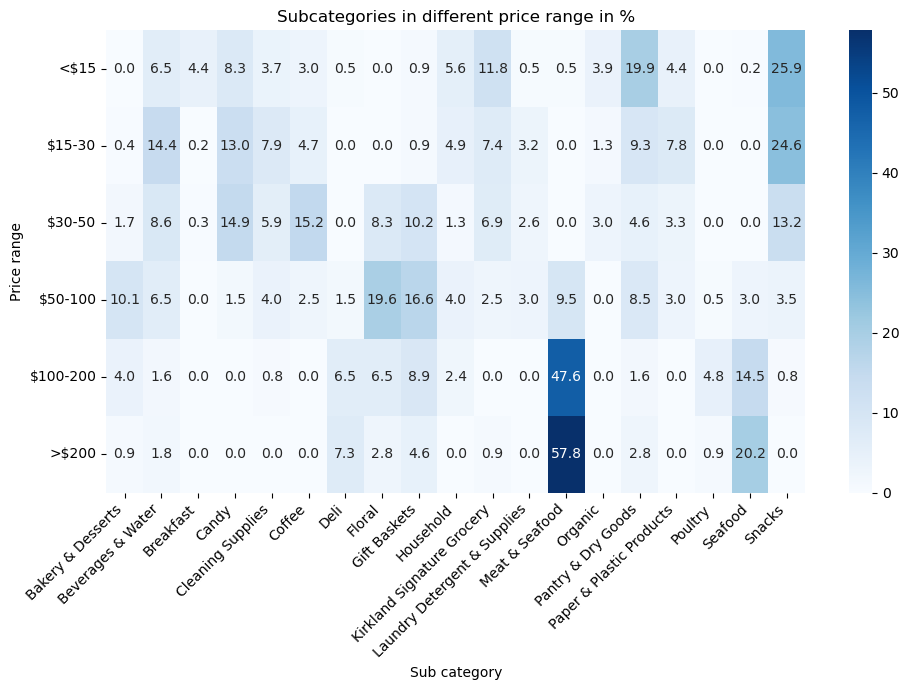

In [27]:
grouped = df.groupby(['Price Group', 'Sub Category'], observed=True).size().unstack(fill_value=0)
percent_dist =grouped.div(grouped.sum(axis=1),axis=0)*100

plt.figure(figsize=(10,7))
sns.heatmap(percent_dist, annot=True, fmt=".1f", cmap='Blues')

plt.title("Subcategories in different price range in %")
plt.ylabel("Price range")
plt.xlabel("Sub category")
plt.xticks(rotation=45,ha='right')
plt.yticks(rotation=0)   
plt.tight_layout()
plt.show()